#### A study analyzes the data on law school admission, and the goal is to examine the correlation between LSAT score and the first year GPA. For each of 15 law schools, we have the pair of data points (LSAT, GPA) as<br>(576, 3.93), (580, 3.07), (653, 3.12)<br>(635, 3.30), (555, 3.00), (575, 2.74)<br>(558, 2.81), (661, 3.43), (545, 2.76)<br>(578, 3.03), (651, 3.36), (572, 2.88)<br>(666, 3.44), (605, 3.13), (594, 2.96)<br><br> (a)Calculate the correlation coefficient between LSAT and GPA.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def get_correlation_coefficient(x, y):
    n = x.shape[0]
    numerator = n*sum(x*y) - sum(x) * sum(y)
    denominator = ((n * sum(x**2) - sum(x)**2 )* ( n * sum(y**2) - sum(y)**2)) ** 0.5
    return numerator/denominator

In [9]:
data = pd.read_csv('admission.csv')
print(data)
lsat = data['LSAT']
gpa = data['GPA']
cc = get_correlation_coefficient(lsat, gpa)
print('\nCorrelation Coefficient =', cc)

    LSAT   GPA
0    576  3.93
1    635  3.30
2    558  2.81
3    578  3.03
4    666  3.44
5    580  3.07
6    555  3.00
7    661  3.43
8    651  3.36
9    605  3.13
10   653  3.12
11   575  2.74
12   545  2.76
13   572  2.88
14   594  2.96

Correlation Coefficient = 0.5230662703149559


#### (b) Pick the programming language of your choice, and use bootstrapping to estimate the standard deviation of the correlation coefficient. Use *B* = 1000 bootstrap resamples. Also plot a histogram of the results (use 20 bins).

Standard Deviation of the correlation coefficient= 0.26408412794869174


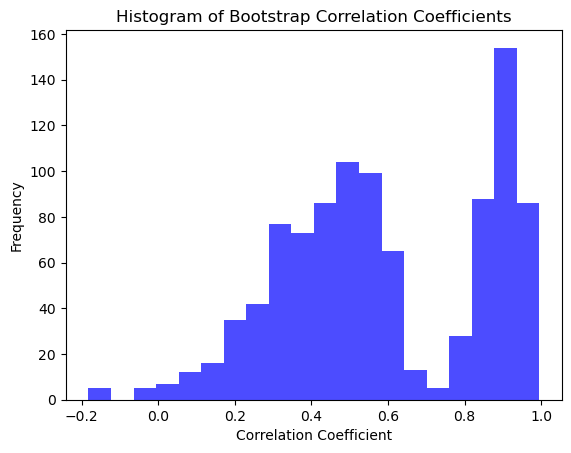

In [10]:
B = 1000
correlations_coefficient = np.zeros(B)
for i in range(B):
    if i == 0:
        # set the initial correlations coefficient
        correlations_coefficient[0] = cc
        continue

    residBoot = np.random.choice(data.index, size=len(data), replace=True)
    bootstrapSet = data.loc[residBoot]
    # print("~ ~ ~ ~ ~ ~ Set", i ,"~ ~ ~ ~ ~ ~\n", bootstrap_set)
    correlations_coefficient[i] = get_correlation_coefficient(bootstrapSet['LSAT'], bootstrapSet['GPA'])

standard_deviation = np.std(correlations_coefficient)
print('Standard Deviation of the correlation coefficient=', standard_deviation)

# Plot the histogram of the bootstrap correlation coefficients
plt.hist(correlations_coefficient, bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Bootstrap Correlation Coefficients")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()